This notebook preocesses data for A8, D8, and E8 algebras' invariants. It computes frequency distributions for each component of the corresponding SOCMs, generating fake data based on this information. It then checks the quality of this fake data by looking for duplicates in both the fake and real datasets. For the resulting fake data, this code also checks a unique characteristic in the A8, D8, and E8 algebras' data — how many zeros appear in the components — to ensure the accuracy of the fake data.

In [1]:
import numpy as np
from itertools import chain
from math import floor
import matplotlib.pyplot as plt
import time
from numpy.random import choice
from collections import Counter
from tqdm import tqdm

In [2]:
# Import data -- in format 
# [[(permutation order of roots in W definition), [list of invariant coefficient vectors], ...all permutations]

# Modified files are used: all 1/2, 3/2, 5/2 are replaced by 0.5, 1.5, 2,5

# Extract invarinats' components into a list 
def parseString(string):
    '''Extract permutation as a string and invariants' components as an array'''
    tmp = list(string[1:-2].split(", [["))
    return [ [float(i) for i in list(elem.split(", "))]  for elem in list(tmp[1][:-1].split("], ["))]

start = time.time()

# Create np array for storing permutations and invariants' components
data_A8 = np.zeros((40320, 9*256), dtype=np.float16)
data_D8 = np.zeros((40320, 9*256), dtype=np.float16)
data_E8 = np.zeros((40320, 9*256), dtype=np.float16)

# Read data from files, concatenate each invarinat's components
lnIdx = 0
with open('ADE_Data\A8inv_Data_mod.txt','r') as file:
    for line in file:
        data_A8[lnIdx] = np.concatenate(parseString(line.rstrip()))
        lnIdx = lnIdx + 1
        
lnIdx = 0
with open('ADE_Data\D8inv_Data_mod.txt','r') as file:
    for line in file:
        data_D8[lnIdx] = np.concatenate(parseString(line.rstrip()))
        lnIdx = lnIdx + 1

lnIdx = 0
with open('ADE_Data\E8inv_Data_mod.txt','r') as file:
    for line in file:
        data_E8[lnIdx] = np.concatenate(parseString(line.rstrip()))
        lnIdx = lnIdx + 1
        
end = time.time()
print(end - start)

dataSize = len(data_E8)

55.76289415359497


In [3]:
# Count frequency of values for each component of the invariant

start = time.time()

cptsSize = len(data_E8[0])

cptsCount_A8 = [dict(Counter(data_A8[:,index])) for index in range(cptsSize)]
cptsCount_D8 = [dict(Counter(data_D8[:,index])) for index in range(cptsSize)]
cptsCount_E8 = [dict(Counter(data_E8[:,index])) for index in range(cptsSize)]

end = time.time()
print(end - start)

print(np.shape(cptsCount_E8))

48.652538776397705
(2304,)


<BarContainer object of 5 artists>

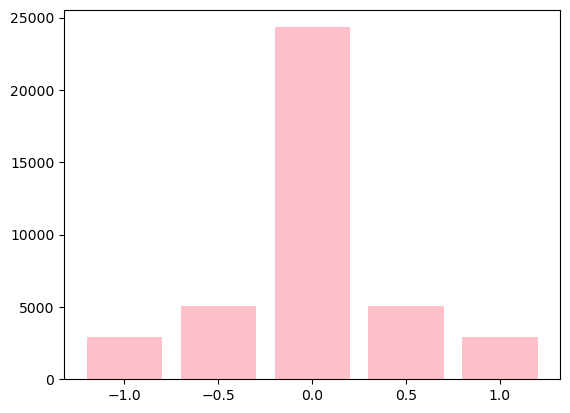

In [4]:
# Plot counter for a random component
width = 0.4
plt.bar(dict(cptsCount_E8[280]).keys(), dict(cptsCount_E8[280]).values(), width, color='pink')

In [5]:
# Normalize the counter to get a distribution 
cptsDistr_E8 = [{list(cptDict.keys())[i]: list(cptDict.values())[i]/sum(cptDict.values()) for i in range(len(cptDict.keys()))} for cptDict in cptsCount_E8]
cptsDistr_D8 = [{list(cptDict.keys())[i]: list(cptDict.values())[i]/sum(cptDict.values()) for i in range(len(cptDict.keys()))} for cptDict in cptsCount_D8]
cptsDistr_A8 = [{list(cptDict.keys())[i]: list(cptDict.values())[i]/sum(cptDict.values()) for i in range(len(cptDict.keys()))} for cptDict in cptsCount_A8]

<BarContainer object of 5 artists>

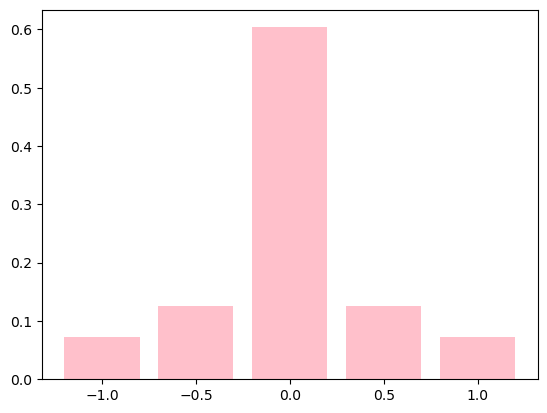

In [6]:
# Plot counter for one of a random components
width = 0.4
plt.bar(cptsDistr_E8[280].keys(), cptsDistr_E8[280].values(), width, color='pink')

In [7]:
# Genrate fake data
fakeDataSize = 80000

fakeData_A8 = np.fromiter( (choice(list(cptsDistr_A8[index].keys()), fakeDataSize, p=list(cptsDistr_A8[index].values())) for index in range(cptsSize)), dtype=np.dtype((np.float16, fakeDataSize)))
fakeData_E8 = np.fromiter( (choice(list(cptsDistr_E8[index].keys()), fakeDataSize, p=list(cptsDistr_E8[index].values())) for index in range(cptsSize)), dtype=np.dtype((np.float16, fakeDataSize)))
fakeData_D8 = np.fromiter( (choice(list(cptsDistr_D8[index].keys()), fakeDataSize, p=list(cptsDistr_D8[index].values())) for index in range(cptsSize)), dtype=np.dtype((np.float16, fakeDataSize)))

In [8]:
# Transpose the data array to access fake invariant by the first index and its components by the second index

fakeData_E8 = np.transpose(fakeData_E8)
fakeData_D8 = np.transpose(fakeData_D8)
fakeData_A8 = np.transpose(fakeData_A8)

In [9]:
# Dataset of strings for fake E8, D8, A8 fast elements comparison
fakeDataStr_A8 = [ fakeData_A8[index].tobytes() for index in range(fakeDataSize) ]
fakeDataStr_D8 = [ fakeData_D8[index].tobytes() for index in range(fakeDataSize) ]
fakeDataStr_E8 = [ fakeData_E8[index].tobytes() for index in range(fakeDataSize) ]

# Dataset of strings for fake E8, D8, A8 fast elements comparison
dataStr_A8 = [ data_A8[index].tobytes() for index in range(dataSize) ]
dataStr_D8 = [ data_D8[index].tobytes() for index in range(dataSize) ]
dataStr_E8 = [ data_E8[index].tobytes() for index in range(dataSize) ]

In [10]:
# Check E8 fake data for duplicates

duplicates_fakeE8 = np.zeros(fakeDataSize, dtype=int)

for idx1 in tqdm(range(fakeDataSize)):
    if duplicates_fakeE8[idx1] == 1:
            continue
    for idx2 in range(idx1+1,fakeDataSize):
        if duplicates_fakeE8[idx2] == 1:
            continue
        if fakeDataStr_E8[idx1]==fakeDataStr_E8[idx2]:
            duplicates_fakeE8[idx1] = 1
            duplicates_fakeE8[idx2] = 1

print(sum(duplicates_fakeE8))

100%|██████████| 80000/80000 [23:32<00:00, 56.65it/s]  

0


In [11]:
# Check E8 fake data for duplicates in E8 data

duplicates_withE8 = np.zeros(fakeDataSize, dtype=int)

for idx1 in tqdm(range(dataSize)):
    for idx2 in range(fakeDataSize):
        if dataStr_E8[idx1]==fakeDataStr_E8[idx2]:
            duplicates_withE8[idx1] = 1
            duplicates_withE8[idx2] = 1
            
print(sum(duplicates_withE8))

100%|██████████| 40320/40320 [15:35<00:00, 43.10it/s]

0


In [12]:
# Check E8 fake data preserves the number of zeros: 1942

good_invariants = np.zeros(fakeDataSize, dtype=int)

for idx, inv in enumerate(fakeData_E8):
    if (len(inv)-np.count_nonzero(inv)) == 1942:
        good_invariants[idx] = 1
            
print(sum(good_invariants))

3004


In [13]:
# Only keep good invariants in fake dataset for E8
fakeData_E8_good = []

for i in range(fakeDataSize):
    if good_invariants[i] == 1:
        fakeData_E8_good.append(fakeData_E8[i])
        
print(len(fakeData_E8_good))

3004


In [14]:
# Check D8 fake data for duplicates
            
duplicates_fakeD8 = np.zeros(fakeDataSize, dtype=int)

for idx1 in tqdm(range(fakeDataSize)):
    if duplicates_fakeD8[idx1] == 1:
            continue
    for idx2 in range(idx1+1,fakeDataSize):
        if duplicates_fakeD8[idx2] == 1:
            continue
        if fakeDataStr_D8[idx1]==fakeDataStr_D8[idx2]:
            duplicates_fakeD8[idx1] = 1
            duplicates_fakeD8[idx2] = 1

print(sum(duplicates_fakeD8))

100%|██████████| 80000/80000 [29:12<00:00, 45.65it/s]  

0


In [17]:
# Check D8 fake data for duplicates in D8 data

duplicates_withD8 = np.zeros(fakeDataSize, dtype=int)

for idx1 in tqdm(range(dataSize)):
    for idx2 in range(fakeDataSize):
        if dataStr_D8[idx1]==fakeDataStr_D8[idx2]:
            duplicates_withD8[idx1] = 1
            duplicates_withD8[idx2] = 1
            
print(sum(duplicates_withD8))

100%|██████████| 40320/40320 [16:18<00:00, 41.22it/s]

0


In [18]:
# Check D8 fake data preserves the number of zeros: 2083

good_invariants = np.zeros(fakeDataSize, dtype=int)

for idx, inv in enumerate(fakeData_D8):
    if (len(inv)-np.count_nonzero(inv)) == 2083:
        good_invariants[idx] = 1
            
print(sum(good_invariants))

3619


In [19]:
# Only keep good invariants in fake dataset for E8
fakeData_D8_good = []

for i in range(fakeDataSize):
    if good_invariants[i] == 1:
        fakeData_D8_good.append(fakeData_D8[i])
        
print(len(fakeData_D8_good))

3619


In [20]:
# Check A8 fake data for duplicates
            
duplicates_fakeA8 = np.zeros(fakeDataSize, dtype=int)

for idx1 in tqdm(range(fakeDataSize)):
    if duplicates_fakeA8[idx1] == 1:
            continue
    for idx2 in range(idx1+1,fakeDataSize):
        if duplicates_fakeA8[idx2] == 1:
            continue
        if fakeDataStr_A8[idx1]==fakeDataStr_A8[idx2]:
            duplicates_fakeA8[idx1] = 1
            duplicates_fakeA8[idx2] = 1

print(sum(duplicates_fakeA8))

100%|██████████| 80000/80000 [22:13<00:00, 59.99it/s]  

0


In [21]:
# Check A8 fake data for duplicates in A8 data

duplicates_withA8 = np.zeros(fakeDataSize, dtype=int)

for idx1 in tqdm(range(dataSize)):
    for idx2 in range(fakeDataSize):
        if dataStr_A8[idx1]==fakeDataStr_A8[idx2]:
            duplicates_withA8[idx1] = 1
            duplicates_withA8[idx2] = 1
            
print(sum(duplicates_withA8))

100%|██████████| 40320/40320 [15:25<00:00, 43.57it/s]

0


In [22]:
# Check A8 fake data preserves the number of zeros: 1805

good_invariants = np.zeros(fakeDataSize, dtype=int)

for idx, inv in enumerate(fakeData_A8):
    if (len(inv)-np.count_nonzero(inv)) == 1805:
        good_invariants[idx] = 1
            
print(sum(good_invariants))

3479


In [23]:
# Only keep good invariants in fake dataset for A8
fakeData_A8_good = []

for i in range(fakeDataSize):
    if good_invariants[i] == 1:
        fakeData_A8_good.append(fakeData_A8[i])
        
print(len(fakeData_A8_good))

3479


In [24]:
np.savetxt('ADE_Data\E8inv_Data_Fake_good.txt', fakeData_E8_good, fmt='%1.1f', delimiter=',') 

np.savetxt('ADE_Data\D8inv_Data_Fake_good.txt', fakeData_D8_good, fmt='%1.1f', delimiter=',') 

np.savetxt('ADE_Data\A8inv_Data_Fake_good.txt', fakeData_A8_good, fmt='%1.1f', delimiter=',') 

In [52]:
# Write fake data to files (OLD!)
with open('ADE_Data\E8inv_Data_Fake.txt','w') as file:
    for line in fakeData_E8:
        file.write(line.tobytes())
        
with open('ADE_Data\D8inv_Data_Fake.txt','w') as file:
    for line in fakeData_D8:
        file.write(line.tobytes())
        
with open('ADE_Data\A8inv_Data_Fake.txt','w') as file:
    for line in fakeData_A8:
        file.write(line.tobytes())

In [12]:
A = np.array([[1,2],[3,4]],dtype=int)

print(list(A))

np.savetxt('ADE_Data/test.txt', A, fmt='%1.1f', delimiter=',') 

[array([1, 2]), array([3, 4])]


In [16]:
np.loadtxt('ADE_Data/test.txt',delimiter=',',)

array([[1., 2.],
       [3., 4.]])